In [ ]:
import core 
import constant as c
import radiation as rd
import weather as w

import numpy as np
import matplotlib.pyplot as plt
import dartwork_mpl as dm
import pandas as pd
from scipy import stats
import seaborn as sns  
import matplotlib.ticker as ticker
import warnings 

warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Noto Sans'

Load colors...
Load colormaps...


In [3]:
time_params  = w.SimulationTimeParameters(PST = 0, MST = 30*c.d2h, dt = 60, start_time=pd.Timestamp('2023-01-01 00:00:00'))

# Load the data 
data = pd.read_csv('2023_weather_data.csv', encoding='cp949')
data.fillna(0, inplace=True)

# Extract the data
temp = np.array(data['기온(°C)'])
windspeed = np.array(data['풍속(m/s)'])
irradiation = np.array(data['일사(MJ/m2)'])

weather = w.WeatherData(
    location = '광주',
    sim_time_params = time_params,
    temperature = temp,
    wind_speed = windspeed,
    GHI_MJm2 = irradiation,
)

IndoorAir = core.IndoorAir(
    temperature = 20,
    ACH = 0.5,
    h_ib= 7,
    volume = 60)

# Set the layer
ins_layer = core.Layer(L=0.1, dx = 0.02, k=0.03, rho=15, c=1500)
con_layer = core.Layer(L=0.2, dx = 0.02, k=1.75, rho=2400, c=880)

# Set the construction
con_ins = [ins_layer, con_layer]
con = [con_layer]


wall_area = 3 * 4

Wall_N = core.Construction(
    name='Wall_N',
    layers = con_ins,
    roughness = 'medium rough',
    solar_absorptance= 0.5,
    Tinit = 20,
    area = wall_area,
    azimuth = 0,
    tilt = 90
)

Wall_S = core.Construction(
    name='Wall_S',
    layers = con_ins,
    roughness = 'medium rough',
    solar_absorptance= 0.5,
    Tinit = 20,
    area = wall_area,
    azimuth = 180,
    tilt = 90
)

Wall_E = core.Construction(
    name='Wall_E',
    layers = con_ins,
    roughness = 'medium rough',
    solar_absorptance= 0.5,
    Tinit = 20,
    area = wall_area,
    azimuth = 90,
    tilt = 90
)

Wall_W = core.Construction(
    name='Wall_W',
    layers = con_ins,
    roughness = 'medium rough',
    solar_absorptance= 0.5,
    Tinit = 20,
    area = wall_area,
    azimuth = 270,
    tilt = 90
)


# Structure 
structure = [Wall_N, Wall_S, Wall_E, Wall_W]

# Indoor air

# Simulation
core.run_building_exergy_model_fully_unsteady(
    structure = structure,
    indoor_air = IndoorAir,
    weather = weather,
    save_path='data',
)


Simulation progress: 100%|██████████| 43201/43201 [00:19<00:00, 2260.74it/s]


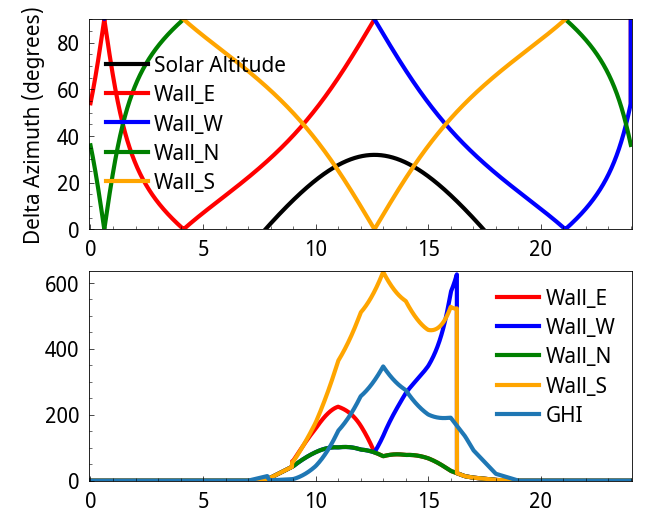

In [5]:
sol_alt, sol_azi = rd.get_solar_position(
    station= '광주',
    SimulationTimeParameters= time_params,
)
del_azi_W = rd.get_delta_azi(sol_azi, Wall_W.azimuth) 
del_azi_E = rd.get_delta_azi(sol_azi, Wall_E.azimuth)
del_azi_N = rd.get_delta_azi(sol_azi, Wall_N.azimuth)
del_azi_S = rd.get_delta_azi(sol_azi, Wall_S.azimuth)

fig, ax = plt.subplots(2,1, dpi = 200)

ax[0].plot(time_params.ts_h_main, sol_alt[:-1],  label = 'Solar Altitude', color = 'black')
ax[0].plot(time_params.ts_h_main, del_azi_E[:-1],label = 'Wall_E', color = 'red')
ax[0].plot(time_params.ts_h_main, del_azi_W[:-1],label = 'Wall_W', color = 'blue')
ax[0].plot(time_params.ts_h_main, del_azi_N[:-1],label = 'Wall_N', color = 'green')
ax[0].plot(time_params.ts_h_main, del_azi_S[:-1],label = 'Wall_S', color = 'orange')

# Set y-axis limits
ax[0].set_ylim(0, 90)

ax[0].set_ylabel('Delta Azimuth (degrees)')
ax[0].legend()

ax[1].plot(time_params.ts_h_main, rd.solar_to_unit_surface(
    weather=weather,
    construction = Wall_E
)[:-1],label = 'Wall_E', color = 'red')

ax[1].plot(time_params.ts_h_main, rd.solar_to_unit_surface(
    weather=weather,
    construction = Wall_W,
)[:-1],label = 'Wall_W', color = 'blue')

ax[1].plot(time_params.ts_h_main, rd.solar_to_unit_surface(
    weather=weather,
    construction = Wall_N,
)[:-1],label = 'Wall_N', color = 'green')

ax[1].plot(time_params.ts_h_main, rd.solar_to_unit_surface(
    weather=weather,
    construction = Wall_S,
)[:-1],label = 'Wall_S', color = 'orange')

ax[1].plot(time_params.ts_h_main, BHI[:-1],
label = 'GHI'
)
plt.legend()

'''
delta azimuth가 해가 져있을 때 0으로 해도 괜찮은 것인지
'''
plt.legend()

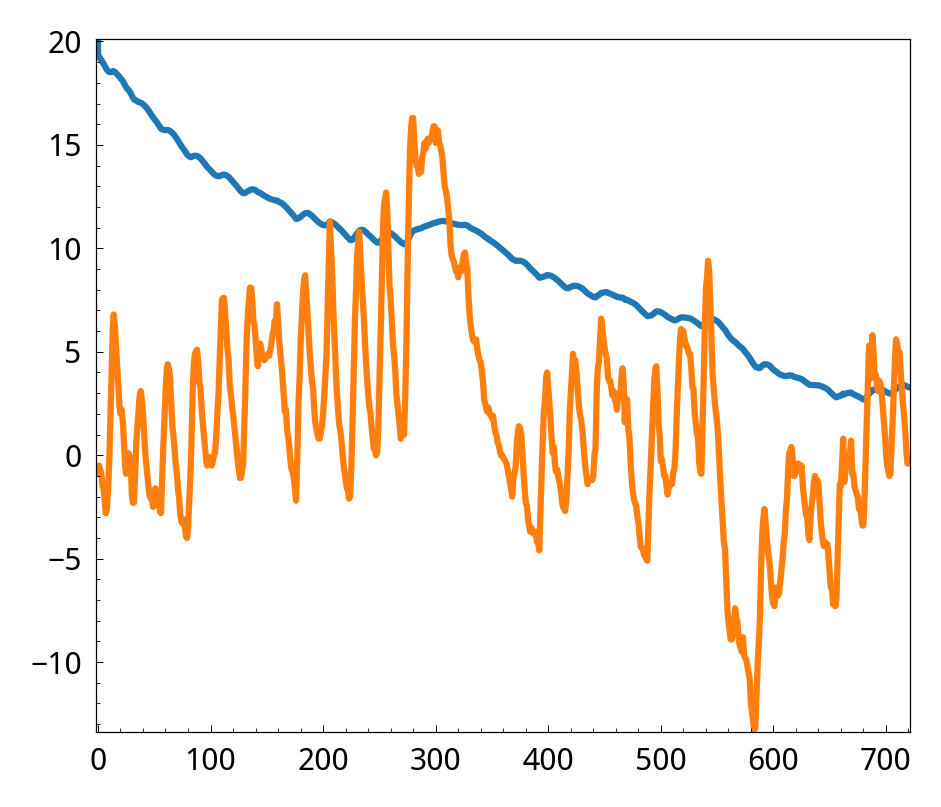

In [6]:
Tia = pd.read_csv('data/indoor_air_temperature.csv')
Toa = pd.read_csv('data/outdoor_air_temperature.csv')
qia = pd.read_csv('data/q_ia.csv')
plt.plot(time_params.ts_h_main,Tia.iloc[:,1])
plt.plot(time_params.ts_h_main,Toa.iloc[:,1])
# plt.plot(time_params.ts_h_main,qia.iloc[:,1])
# plt.ylim(15,25)

# 4. Plot

## 4.0 Weather Data plot

In [ ]:
### 1. INITIALIZATION AND DATA LOADING

## 1.1 Time Variables
dt         = time_params.dt   # [s]
TST        = time_params.TST # [s]
ts_h       = time_params.ts_h_tot*c.h2d + 1 # [day]
temp       = core.K2C(weather.temp[:-1])
wind_speed = weather.wind_speed[:-1]
Gh         = weather.GHI[:-1]
### 3. DATA UPLOADING

data_file_path = "../output"


### 4. PLOTTING

## 4.1 Plot Settings
LW = np.arange(0.25, 3, 0.25)

# Tick settings 
xmin, xmax, xint, xmar = 1, 10, 1, 0
ymin  = np.array([-20, 0, 0])
ymax  = np.array([20, 5, 800])
yint  = np.array([10,  1, 200])
ymar  = (ymax-ymin)/30

nrows, ncols = 3, 1
nfigs = nrows * ncols

## 4.2 Create Figure and Axes
fig, ax = plt.subplots(
    nrows, ncols, 
    sharex    = True,
    sharey    = False,
    figsize   = (dm.cm2in(14), dm.cm2in(10)),
    facecolor = 'none',
    edgecolor = 'k',
    squeeze   = False,
    dpi       = 300,
)

## 4.3 Plot Data
for ridx in range(nrows):
    for cidx in range(ncols):
        idx = ncols * ridx + cidx
        # Add shaded area for initial simulation
        ax[ridx,cidx].axvspan(0, 4, color='black', alpha=0.1, label='Initial Simulation')

        if ridx == 0:
           ax[ridx,cidx].set_title('Gwangju weather data (2023.01.01 - 2023.01.10)', fontsize= dm.fs(1),pad=5)

        # Plot data
        x = ts_h
        y = [temp, wind_speed, Gh][ridx]
        col = ['dm.lime6', 'dm.blue6', 'dm.red6'][ridx]
        ax[ridx,cidx].plot(x, y, color=col, lw=LW[2])
        
        # Set labels
        if ridx == 2:
            ax[ridx,cidx].set_xlabel('Elapsed time [day]', fontsize=dm.fs(0))
        ax[ridx,cidx].set_ylabel(["Temperature [$^{\circ}$C]",
                                  "Wind speed [m/s]",
                                  "Solar radiation [W/m$^2$]"][ridx], fontsize=dm.fs(0))
        
        # Set axis limits and ticks
        ax[ridx,cidx].set_xlim(xmin-xmar, xmax+xmar)
        ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
        ax[ridx,cidx].set_xticks(np.arange(xmin, xmax+xint, xint)) 
        ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx]))
        
        # Set tick parameters
        ax[ridx,cidx].tick_params(direction='in', labelsize=dm.fs(0), which='major', length=2.5, width=0.5, pad=5)
        ax[ridx,cidx].tick_params(direction='in', labelsize=dm.fs(0), which='minor', length=1.25, width=0.25, pad=5)
        ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(3))
        ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        
        # Set grid and spine properties
        ax[ridx,cidx].grid(False)
        for k in ['top','bottom','left','right']:
            ax[ridx,cidx].spines[k].set_visible(True)
            ax[ridx,cidx].spines[k].set_linewidth(0.5)
            ax[ridx,cidx].spines[k].set_color('k') 

# Adjust subplot layout
fig.align_ylabels()
# plt.subplots_adjust(wspace=0.18, hspace=0.08, 
#                     left=0.09, right=0.97,
#                     bottom=0.1, top=0.94)
dm.util.simple_layout(fig, margins=(0.1, 0.1, 0.1, 0.1), verbose=False)

## 4.4 Save Figure
file_path = '.'
figname = 'weather_data'
plt.savefig('weather_data.png', dpi=600, transparent=True)
dm.util.save_and_show(fig, size=600)

## 4.1 Temperature probability

In [8]:
# 데이터 읽기
data_path1 = '../data/10_cm_insulation'
indoor_temp = pd.read_csv(data_path1 + '/indoor_air_temperature.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '../data/10_cm_insulation/indoor_air_temperature.csv'

In [23]:
## 3.1 Plot Settings
nrows, ncols = 1, 2
nfigs = nrows * ncols

# Tick settings 
LW = np.arange(0.25, 3.0, 0.25)  # Line width array

xmin, xmax, xint, xmar = -30, 30, 10, 0
ymax = 0.5
ymin = 0
yint = 0.1
ymar = 0

# 온도 데이터 추출
temperatures = indoor_temp['Indoor Air Temperature [°C]'].values
temperatures1 = indoor_temp1['Indoor Air Temperature [°C]'].values

# 히스토그램 설정
bins = np.arange(xmin, xmax, 0.5)  # 15도부터 40도까지 0.5도 간격으로 bins 생성
hist, bin_edges = np.histogram(temperatures, bins=bins, density=True)
hist1, bin_edges1 = np.histogram(temperatures1, bins=bins, density=True)

# KDE (Kernel Density Estimation)를 사용한 부드러운 확률 밀도 함수
kde = stats.gaussian_kde(temperatures)
kde1 = stats.gaussian_kde(temperatures1)
x_range = np.arange(xmin, xmax, 0.02)
kde_values = kde(x_range)
kde_values1 = kde1(x_range)

# 그래프 그리기
## 3.2 Create Figure
fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(5)))
gs = fig.add_gridspec(
    nrows, ncols,
)

axs = []
for i in range(nfigs):
  axs.append(fig.add_subplot(gs[i]))

# 히스토그램
axs[0].hist(temperatures, bins=bins, density=True, color='dm.blue2', alpha=0.5, label='Histogram')
axs[1].hist(temperatures1, bins=bins, density=True, color='dm.blue2', alpha=0.5, label='Histogram')

# KDE 곡선
axs[0].plot(x_range, kde_values, color='dm.red6', lw=LW[2], label='Density Estimation')
axs[1].plot(x_range, kde_values1, color='dm.red6', lw=LW[2], label='Density Estimation')

# 그래프 꾸미기
axs[0].grid(True, alpha=0.3)
axs[1].grid(True, alpha=0.3)

for ridx in range(nrows):
  for cidx in range(ncols):
      idx = ncols*ridx + cidx

      # Set legend
      handles, labels = axs[idx].get_legend_handles_labels() 
      legend1 = axs[idx].legend(handles, labels, 
                   loc="upper right", ncol=1, frameon=False, 
                   edgecolor='None', facecolor='None',
                   fontsize=dm.fs(-2.5), fancybox=False, 
                   columnspacing=1.05, labelspacing=0.8,
                   bbox_to_anchor=(1, 0.975),
                   handlelength=1.5)
     
      axs[idx].set_xlabel('Indoor Air Temperature [°C]', fontsize=dm.fs(-0.5), labelpad=3)
      if idx == 0:
        axs[idx].set_ylabel('Probability Density', fontsize=dm.fs(-0.5), labelpad=3)
      
      # annotation
      axs[idx].annotate(
        ['(a) 10 cm External Insulation','(b) No insulation'][idx],
        fontsize = dm.fs(-1.5),
        xy=(0.02, 0.95), xycoords='axes fraction',
        horizontalalignment='left', verticalalignment='top',
                )

      # Set axis limits and ticks
      axs[idx].set_xlim(xmin-xmar, xmax+xmar)
      axs[idx].set_ylim(ymin-ymar, ymax+ymar)
      axs[idx].set_xticks(np.arange(xmin, xmax+xint, xint)) 
      axs[idx].set_yticks(np.arange(ymin, ymax+yint, yint))
      
      # Set tick parameters
      axs[idx].tick_params(direction='in', labelsize=dm.fs(0), which='major', length=2.5, width=0.5, pad=5)
      axs[idx].tick_params(direction='in', labelsize=dm.fs(0), which='minor', length=1.25, width=0.25, pad=5)
      axs[idx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
      axs[idx].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# 기초 통계량 출력
print("Well-insulated House:")
print(f"평균 온도: {np.mean(temperatures):.2f}°C")
print(f"표준편차: {np.std(temperatures):.2f}°C")
print(f"최소 온도: {np.min(temperatures):.2f}°C")
print(f"최대 온도: {np.max(temperatures):.2f}°C")
print("\nNo insulation House:")
print(f"평균 온도: {np.mean(temperatures1):.2f}°C")
print(f"표준편차: {np.std(temperatures1):.2f}°C")
print(f"최소 온도: {np.min(temperatures1):.2f}°C")
print(f"최대 온도: {np.max(temperatures1):.2f}°C")

## 3.4 Save Figure
fig_name = '2023_January_temperature_distribution'
dm.simple_layout(fig, bbox=(0.01, 1, 0.1, 1), verbose=False)
dm.save_and_show(fig, size=600)
plt.savefig(fig_name + '.png', dpi=600, transparent=True)
# plt.close()



Well-insulated House:
평균 온도: -253.15°C
표준편차: 0.00°C
최소 온도: -253.15°C
최대 온도: -253.15°C

No insulation House:
평균 온도: -253.15°C
표준편차: 0.00°C
최소 온도: -253.15°C
최대 온도: -253.15°C


<Figure size 1050x900 with 0 Axes>

## 4.2 Exergy consumption comparison

### 4.2.1 Data import

In [28]:
# XcR
IC_Roof_E_XcR = np.sum(pd.read_csv(data_path1 + '/Roof_E_XcR.csv', index_col=0), axis=1)
IC_Roof_W_XcR = np.sum(pd.read_csv(data_path1 + '/Roof_W_XcR.csv', index_col=0), axis=1)
IC_Wall_N_XcR = np.sum(pd.read_csv(data_path1 + '/Wall_N_XcR.csv', index_col=0), axis=1)
IC_Wall_S_XcR = np.sum(pd.read_csv(data_path1 + '/Wall_S_XcR.csv', index_col=0), axis=1)
IC_Wall_E_XcR = np.sum(pd.read_csv(data_path1 + '/Wall_E_XcR.csv', index_col=0), axis=1)
IC_Wall_W_XcR = np.sum(pd.read_csv(data_path1 + '/Wall_W_XcR.csv', index_col=0), axis=1)
IC_IndoorAir = pd.read_csv(data_path1 + '/indoor_air_temperature.csv', index_col=0)

# XcR
C_Roof_E_XcR = np.sum(pd.read_csv(data_path2 + '/Roof_E_XcR.csv', index_col=0), axis=1)
C_Roof_W_XcR = np.sum(pd.read_csv(data_path2 + '/Roof_W_XcR.csv', index_col=0), axis=1)
C_Wall_N_XcR = np.sum(pd.read_csv(data_path2 + '/Wall_N_XcR.csv', index_col=0), axis=1)
C_Wall_S_XcR = np.sum(pd.read_csv(data_path2 + '/Wall_S_XcR.csv', index_col=0), axis=1)
C_Wall_E_XcR = np.sum(pd.read_csv(data_path2 + '/Wall_E_XcR.csv', index_col=0), axis=1)
C_Wall_W_XcR = np.sum(pd.read_csv(data_path2 + '/Wall_W_XcR.csv', index_col=0), axis=1)
C_IndoorAir2 = pd.read_csv(data_path2 + '/indoor_air_temperature.csv', index_col=0)

# Norm_rad
Roof_E_Norm_rad = pd.read_csv(data_path1 + '/Roof_E_Norm_rad.csv', index_col=0)
Roof_W_Norm_rad = pd.read_csv(data_path1 + '/Roof_W_Norm_rad.csv', index_col=0) 
Wall_N_Norm_rad = pd.read_csv(data_path1 + '/Wall_N_Norm_rad.csv', index_col=0)
Wall_S_Norm_rad = pd.read_csv(data_path1 + '/Wall_S_Norm_rad.csv', index_col=0)


### 4.2.2 Roof exergy consumption comparison

#### 4.2.2.1 Roof E

In [29]:
## 3.1 Plot Settings
nrows, ncols = 1, 1
nfigs = nrows * ncols

# Tick settings 
LW = np.arange(0.25, 3.0, 0.25)  # Line width array
# Tick settings 
xmin, xmax, xint, xmar = 4, 10, 1, 0  # x축 범위 수정
ymax = np.array([1.2, 1000, 10])  # 첫 번째 subplot의 y축 최대값을 11로 수정
ymin = np.array([0, 0, 0])      # 첫 번째 subplot의 y축 최소값을 0으로 수정
yint = np.array([0.3, 250, 2])    # 첫 번째 subplot의 y축 간격을 2로 수정
ymar = (ymax - ymin) / 30

## 3.2 Create Figure
fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(5)))

gs = fig.add_gridspec(
   nrows, ncols, 
   wspace=0.2, hspace=0.09,
)

axs = gs.subplots(sharex=True, sharey=False)
x = IC_Roof_E_XcR.index*tn.h2d + 1
## 3.3 Plot Data
# Plotting XcR data
axs.plot(x,IC_Roof_E_XcR, label='Insulated', color='dm.indigo6', lw=LW[4])
axs.plot(x,C_Roof_E_XcR, label='No insulation', color='dm.green6', lw=LW[4])

# Set legend
handles, labels = axs.get_legend_handles_labels()
legend1 = axs.legend(handles, labels,
               loc="upper right", ncol=2, frameon=False,
               edgecolor='None', facecolor='None', 
               fontsize=dm.fs(-0.5), fancybox=False,
               columnspacing=1.05, labelspacing=0.8,
               bbox_to_anchor=(1.0, 1),
               handlelength=1.5)

for ridx in range(nrows):
   for cidx in range(ncols):
       idx = ncols*ridx + cidx
       
       # Set labels
       if ridx == nrows-1:  # Only bottom subplot
           axs.set_xlabel('Elapsed time [day]', fontsize=dm.fs(1.5))
           
       ylabel = ['Exergy consum rate [W/m$^2$]']   
       axs.set_ylabel(ylabel[0], fontsize=dm.fs(0.5), labelpad=3)
       
       # annotation
       axs.annotate(
         'Roof_E',
       fontsize = dm.fs(0),
       xy=(0.02, 0.95), xycoords='axes fraction',
       horizontalalignment='left', verticalalignment='top',)

       # Set axis limits and ticks
       axs.set_xlim(xmin-xmar, xmax+xmar)
       axs.set_ylim(ymin[ridx]-ymar[ridx], ymax[ridx]+ymar[ridx])
       axs.set_xticks(np.arange(xmin, xmax+xint, xint)) 
       axs.set_yticks(np.arange(ymin[ridx], ymax[ridx]+yint[ridx], yint[ridx]))
       
       # Set tick parameters
       axs.tick_params(direction='in', labelsize=dm.fs(0.5), which='major', length=2.5, width=0.5, pad=5)
       axs.tick_params(direction='in', labelsize=dm.fs(0.5), which='minor', length=1.25, width=0.25, pad=5)
       axs.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
       axs.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
       
       # Set grid and spine properties
       axs.grid(False)
       for k in ['top', 'bottom', 'left', 'right']:
           axs.spines[k].set_visible(True)
           axs.spines[k].set_linewidth(0.5)
           axs.spines[k].set_color('k') 
fig.tight_layout()
fig.align_ylabels()

# Add title
axs.set_title('Roof_E', fontsize=dm.fs(0.5), pad=20)

## 3.4 Save Figure
fig_name = 'winter_Roof_E_Xc'
dm.simple_layout(fig, bbox=(0.015, 1, 0.1, 1), verbose=False)
plt.savefig(fig_name + '.png', dpi=600, transparent=True)
dm.save_and_show(fig, size=600)

# dmpl 에 마진 자동으로 정렬해주는 기능 있음 

In [120]:
## 3.1 Plot Settings
nrows, ncols = 1, 1
nfigs = nrows * ncols

# Tick settings 
LW = np.arange(0.25, 3.0, 0.25)  # Line width array
# Tick settings 
xmin, xmax, xint, xmar = 4, 10, 1, 0  # x축 범위 수정
ymax = np.array([1.2, 1000, 10])  # 첫 번째 subplot의 y축 최대값을 11로 수정
ymin = np.array([0, 0, 0])      # 첫 번째 subplot의 y축 최소값을 0으로 수정
yint = np.array([0.3, 250, 2])    # 첫 번째 subplot의 y축 간격을 2로 수정
ymar = (ymax - ymin) / 30

## 3.2 Create Figure
fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(5)))

gs = fig.add_gridspec(
   nrows, ncols, 
   wspace=0.2, hspace=0.09,
)

axs = gs.subplots(sharex=True, sharey=False)
x = IC_Wall_S_XcR.index*tn.h2d + 1
## 3.3 Plot Data
# Plotting XcR data
axs.plot(x,IC_Wall_S_XcR, label='Insulated', color='dm.indigo6', lw=LW[4])
axs.plot(x,C_Wall_S_XcR, label='No insulation', color='dm.green6', lw=LW[4])

# Set legend
handles, labels = axs.get_legend_handles_labels()
legend1 = axs.legend(handles, labels,
               loc="upper right", ncol=2, frameon=False,
               edgecolor='None', facecolor='None', 
               fontsize=dm.fs(-0.5), fancybox=False,
               columnspacing=1.05, labelspacing=0.8,
               bbox_to_anchor=(1.0, 1),
               handlelength=1.5)

for ridx in range(nrows):
   for cidx in range(ncols):
       idx = ncols*ridx + cidx
       
       # Set labels
       if ridx == nrows-1:  # Only bottom subplot
           axs.set_xlabel('Elapsed time [day]', fontsize=dm.fs(1.5))
           
       ylabel = ['Exergy consum rate [W/m$^2$]']   
       axs.set_ylabel(ylabel[0], fontsize=dm.fs(0.5), labelpad=3)
       # annotation=
       axs.annotate(
         'Wall_S',
       fontsize = dm.fs(0),
       xy=(0.02, 0.95), xycoords='axes fraction',
       horizontalalignment='left', verticalalignment='top',)

       # Set axis limits and ticks
       axs.set_xlim(xmin-xmar, xmax+xmar)
       axs.set_ylim(ymin[ridx]-ymar[ridx], ymax[ridx]+ymar[ridx])
       axs.set_xticks(np.arange(xmin, xmax+xint, xint)) 
       axs.set_yticks(np.arange(ymin[ridx], ymax[ridx]+yint[ridx], yint[ridx]))
       
       # Set tick parameters
       axs.tick_params(direction='in', labelsize=dm.fs(0.5), which='major', length=2.5, width=0.5, pad=5)
       axs.tick_params(direction='in', labelsize=dm.fs(0.5), which='minor', length=1.25, width=0.25, pad=5)
       axs.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
       axs.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
       
       # Set grid and spine properties
       axs.grid(False)
       for k in ['top', 'bottom', 'left', 'right']:
           axs.spines[k].set_visible(True)
           axs.spines[k].set_linewidth(0.5)
           axs.spines[k].set_color('k') 
fig.tight_layout()
fig.align_ylabels()

# Add title
axs.set_title('Wall_S', fontsize=dm.fs(0.5), pad=20)

## 3.4 Save Figure
fig_name = 'winter_Wall_S_Xc'
dm.simple_layout(fig, bbox=(0.015, 1, 0.1, 1), verbose=False)
plt.savefig(fig_name + '.png', dpi=600, transparent=True)
plt.savefig(fig_name + '.png', dpi=600, transparent=True)
dm.save_and_show(fig, size=600)

# dmpl 에 마진 자동으로 정렬해주는 기능 있음 

## 4.3 room exergy demand

In [91]:
# room exergy demand
CI_room_X_demand = pd.read_csv(data_path1 + '/room_exergy_demand.csv', index_col=0)
C_room_X_demand = pd.read_csv(data_path2 + '/room_exergy_demand.csv', index_col=0)

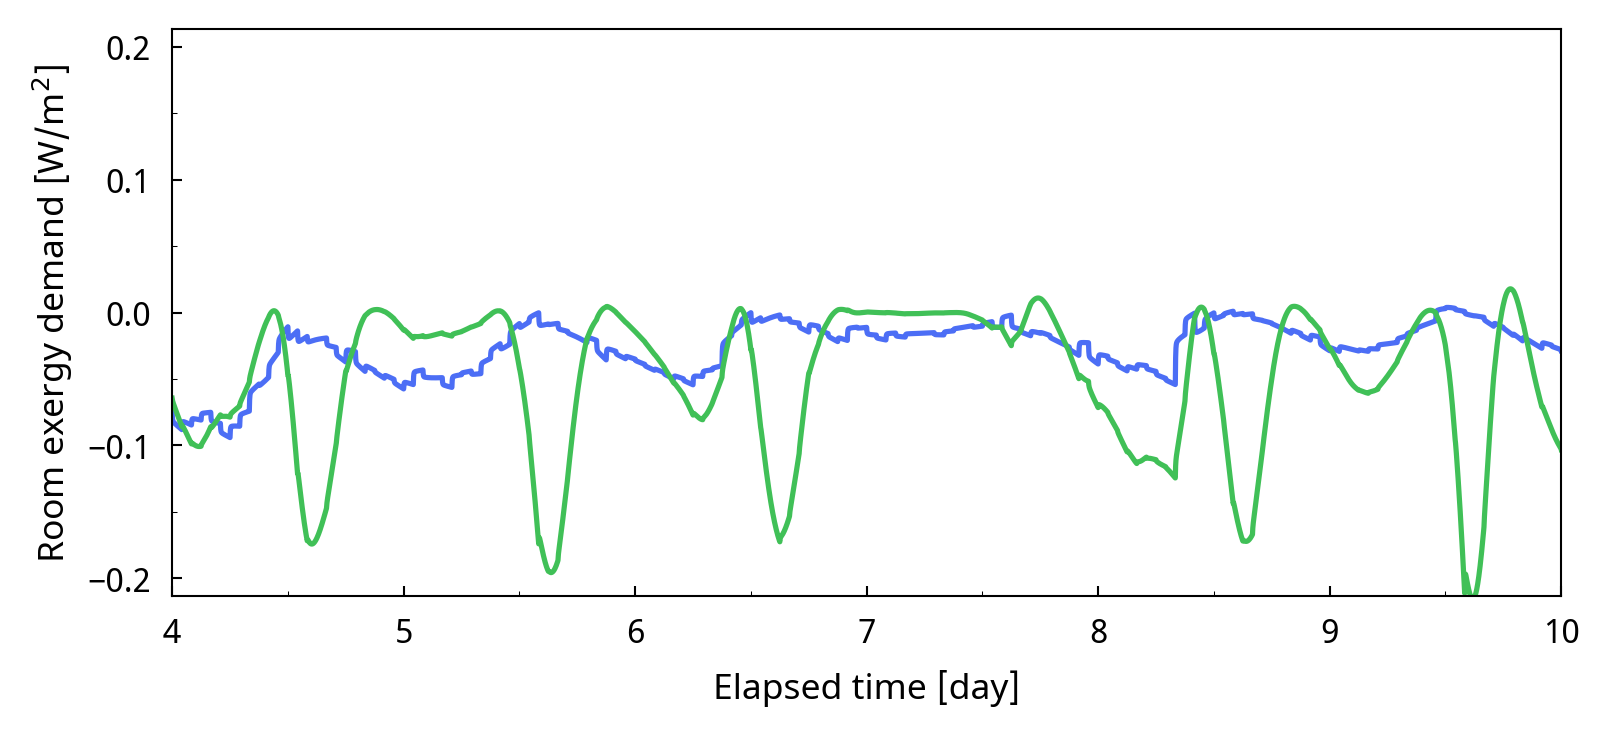

In [121]:
## 3.1 Plot Settings
nrows, ncols = 1, 1
nfigs = nrows * ncols

# Tick settings 
LW = np.arange(0.25, 3.0, 0.25)  # Line width array
xmin, xmax, xint, xmar = 4, 10, 1, 0
ymax =  0.2  # Changed from 10 to 1
ymin = -0.2
yint = 0.1 # Changed from 2 to 0.2
ymar = (ymax - ymin) / 30

## 3.2 Create Figure
fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(6)))

gs = fig.add_gridspec(
    nrows, ncols, 
    left=0.12, right=0.96, bottom=0.15, top=0.95,
    wspace=0.2, hspace=0.09,
)

ax = fig.add_subplot(gs[0])

## 3.3 Plot Data
x = CI_room_X_demand.index*tn.h2d + 1

# Plot data
ax.plot(x, CI_room_X_demand, label='10 cm External Insulation', color='dm.indigo6', lw=LW[4])
ax.plot(x, C_room_X_demand, label='No insulation', color='dm.green6', lw=LW[4])


# Set legend
handles, labels = ax.get_legend_handles_labels() 
legend1 = axs.legend(handles, labels,
               loc="upper right", ncol=2, frameon=False,
               edgecolor='None', facecolor='None', 
               fontsize=dm.fs(-0.5), fancybox=False,
               columnspacing=1.05, labelspacing=0.8,
               bbox_to_anchor=(1.0, 1),
               handlelength=1.5)

# Set labels
ax.set_xlabel('Elapsed time [day]', fontsize=dm.fs(1))
ax.set_ylabel('Room exergy demand [W/m$^2$]', fontsize=dm.fs(1), labelpad=3)

# Set axis limits and ticks
ax.set_xlim(xmin-xmar, xmax+xmar)
ax.set_ylim(ymin-ymar, ymax+ymar)
ax.set_xticks(np.arange(xmin, xmax+xint, xint)) 
ax.set_yticks(np.arange(ymin, ymax+yint, yint))

# Set tick parameters
ax.tick_params(direction='in', labelsize=dm.fs(0.5), which='major', length=2.5, width=0.5, pad=5)
ax.tick_params(direction='in', labelsize=dm.fs(0.5), which='minor', length=1.25, width=0.25, pad=5)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# Set grid and spine properties
ax.grid(False)
for k in ['top', 'bottom', 'left', 'right']:
    ax.spines[k].set_visible(True)
    ax.spines[k].set_linewidth(0.5)
    ax.spines[k].set_color('k') 

## 3.4 Save Figure
fig_name = 'Room_Exergy_Demand'
plt.savefig(fig_name + '.png', dpi=600, transparent=True)

In [109]:
# Set data for plotting
data_path = '../data'
data_path1 = '../data1'

# T
IC_Roof_E_T = pd.read_csv(data_path + '/Roof_E_T.csv', index_col=0).iloc[:,0]

# T
C_Roof_E_T = pd.read_csv(data_path1 + '/Roof_E_T.csv', index_col=0).iloc[:,0]

FileNotFoundError: [Errno 2] No such file or directory: '../data/Roof_E_T.csv'

NameError: name 'IC_Roof_E_T' is not defined

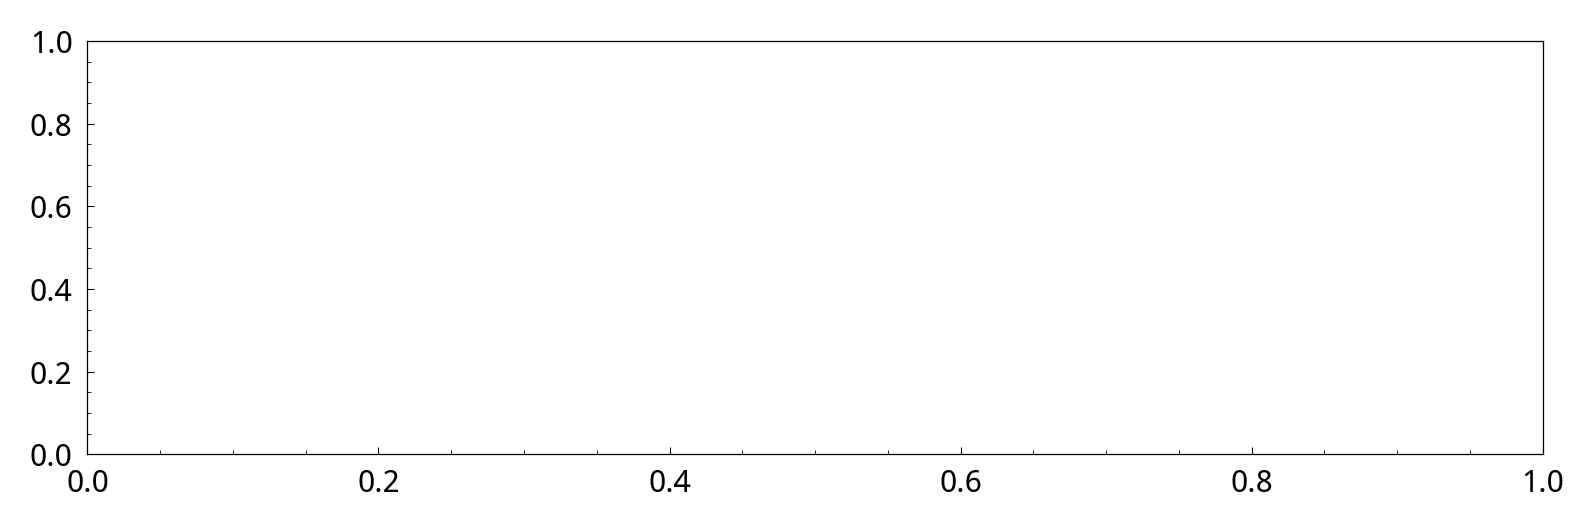

In [ ]:
## 3.1 Plot Settings
nrows, ncols = 1, 1
nfigs = nrows * ncols

# Tick settings 
LW = np.arange(0.25, 3.0, 0.25)  # Line width array

# Tick settings 
xmin, xmax, xint, xmar = 4, 10, 3, 0  # x축 범위 수정
ymax = np.array([45, 1000, 10])  # 첫 번째 subplot의 y축 최대값을 11로 수정
ymin = np.array([-15, 0, 0])      # 첫 번째 subplot의 y축 최소값을 0으로 수정
yint = np.array([10, 250, 2])    # 첫 번째 subplot의 y축 간격을 2로 수정
ymar = (ymax - ymin) / 30

## 3.2 Create Figure
fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(5)))

gs = fig.add_gridspec(
   nrows, ncols, 
   left=0.08, right=0.96, bottom=0.2, top=0.9,
   wspace=0.2, hspace=0.09,
)

axs = gs.subplots(sharex=True, sharey=False)
x = IC_Roof_E_T.index*tn.h2d

## 3.3 Plot Data
# Plotting T data
axs.plot(x,IC_Roof_E_T, label='Insulated', color='dm.indigo6', lw=LW[4])
axs.plot(x,C_Roof_E_T, label='No insulation', color='dm.green6', lw=LW[4])

# Set legend
handles, labels = axs.get_legend_handles_labels()
legend1 = axs.legend(handles, labels,
               loc="lower left", ncol=2, frameon=False,
               edgecolor='None', facecolor='None', 
               fontsize=dm.fs(-0.5), fancybox=False,
               columnspacing=1.05, labelspacing=0.8,
               bbox_to_anchor=(0.0, 0.975),
               handlelength=1.5)

for ridx in range(nrows):
   for cidx in range(ncols):
       idx = ncols*ridx + cidx
       
       # Set labels
       if ridx == nrows-1:  # Only bottom subplot
           axs.set_xlabel('Elapsed time [day]', fontsize=dm.fs(1.5))
           
       ylabel = ['Outer surface temp [$^{\circ}$C]']   
       axs.set_ylabel(ylabel[0], fontsize=dm.fs(0), labelpad=3)

       # Set axis limits and ticks
       axs.set_xlim(xmin-xmar, xmax+xmar)
       axs.set_ylim(ymin[ridx]-ymar[ridx], ymax[ridx]+ymar[ridx])
       axs.set_xticks(np.arange(xmin, xmax+xint, xint)) 
       axs.set_yticks(np.arange(ymin[ridx], ymax[ridx]+yint[ridx], yint[ridx]))
       
       # Set tick parameters
       axs.tick_params(direction='in', labelsize=dm.fs(0.5), which='major', length=2.5, width=0.5, pad=5)
       axs.tick_params(direction='in', labelsize=dm.fs(0.5), which='minor', length=1.25, width=0.25, pad=5)
       axs.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
       axs.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
       
       # Set grid and spine properties
       axs.grid(False)
       for k in ['top', 'bottom', 'left', 'right']:
           axs.spines[k].set_visible(True)
           axs.spines[k].set_linewidth(0.5)
           axs.spines[k].set_color('k') 
fig.tight_layout()
fig.align_ylabels()

# Add title
axs.set_title('Roof_E', fontsize=dm.fs(0.5), pad=20)

## 3.4 Save Figure
fig_name = 'winter_Roof_E_T'
plt.savefig(fig_name + '.png', dpi=600, transparent=True)
dm.save_and_show(fig, size=600)
# dmpl 에 마진 자동으로 정렬해주는 기능 있음 

In [96]:
# Set data for plotting
data_path = '../data'
data_path1 = '../data1'

# T
IC_Roof_E_T = pd.read_csv(data_path + '/Roof_E_T.csv', index_col=0).iloc[:,-1]

# T
C_Roof_E_T = pd.read_csv(data_path1 + '/Roof_E_T.csv', index_col=0).iloc[:,-1]

In [ ]:
## 3.1 Plot Settings
nrows, ncols = 1, 1
nfigs = nrows * ncols

# Tick settings 
LW = np.arange(0.25, 3.0, 0.25)  # Line width array

# Tick settings 
xmin, xmax, xint, xmar = 3, 30, 3, 0  # x축 범위 수정
ymax = np.array([45, 1000, 10])  # 첫 번째 subplot의 y축 최대값을 11로 수정
ymin = np.array([-15, 0, 0])      # 첫 번째 subplot의 y축 최소값을 0으로 수정
yint = np.array([10, 250, 2])    # 첫 번째 subplot의 y축 간격을 2로 수정
ymar = (ymax - ymin) / 30

## 3.2 Create Figure
fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(5)))

gs = fig.add_gridspec(
   nrows, ncols, 
   left=0.08, right=0.96, bottom=0.2, top=0.9,
   wspace=0.2, hspace=0.09,
)

axs = gs.subplots(sharex=True, sharey=False)
x = IC_Roof_E_T.index*tn.h2d
## 3.3 Plot Data
# Plotting T data
axs.plot(x,IC_Roof_E_T, label='Insulated', color='dm.indigo6', lw=LW[4])
axs.plot(x,C_Roof_E_T, label='No insulation', color='dm.green6', lw=LW[4])

# Set legend
handles, labels = axs.get_legend_handles_labels()
legend1 = axs.legend(handles, labels,
               loc="lower left", ncol=2, frameon=False,
               edgecolor='None', facecolor='None', 
               fontsize=dm.fs(-0.5), fancybox=False,
               columnspacing=1.05, labelspacing=0.8,
               bbox_to_anchor=(0.0, 0.975),
               handlelength=1.5)

for ridx in range(nrows):
   for cidx in range(ncols):
       idx = ncols*ridx + cidx
       
       # Set labels
       if ridx == nrows-1:  # Only bottom subplot
           axs.set_xlabel('Elapsed time [day]', fontsize=dm.fs(1.5))
           
       ylabel = ['Inner surface temp [$^{\circ}$C]']   
       axs.set_ylabel(ylabel[0], fontsize=dm.fs(0), labelpad=3)

       # Set axis limits and ticks
       axs.set_xlim(xmin-xmar, xmax+xmar)
       axs.set_ylim(ymin[ridx]-ymar[ridx], ymax[ridx]+ymar[ridx])
       axs.set_xticks(np.arange(xmin, xmax+xint, xint)) 
       axs.set_yticks(np.arange(ymin[ridx], ymax[ridx]+yint[ridx], yint[ridx]))
       
       # Set tick parameters
       axs.tick_params(direction='in', labelsize=dm.fs(0.5), which='major', length=2.5, width=0.5, pad=5)
       axs.tick_params(direction='in', labelsize=dm.fs(0.5), which='minor', length=1.25, width=0.25, pad=5)
       axs.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
       axs.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
       
       # Set grid and spine properties
       axs.grid(False)
       for k in ['top', 'bottom', 'left', 'right']:
           axs.spines[k].set_visible(True)
           axs.spines[k].set_linewidth(0.5)
           axs.spines[k].set_color('k') 
fig.tight_layout()
fig.align_ylabels()

# Add title
axs.set_title('Roof_E', fontsize=dm.fs(0.5), pad=20)

## 3.4 Save Figure
fig_name = 'winter_Roof_E_T_inner'
plt.savefig(fig_name + '.png', dpi=600, transparent=True)
dm.save_and_show(fig, size=600)
# dmpl 에 마진 자동으로 정렬해주는 기능 있음 

C:\Users\Habin Jo\AppData\Local\Temp\ipykernel_73712\1819887837.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
